In [14]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
mongo_uri = "mongodb://10.20.0.250:27017"
connection = MongoClient(mongo_uri)

# CREATE DATABASE
database = connection['SDN_data']
# CREATE COLLECTION
collection = database['params']

In [15]:
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,byteReceived,byteSent,delay,dst,linkUtilization,packetLoss,src,time
0,620a378e5bb5a4c4edc9ecef,556.0,626.0,2.0,of:0000000000000003,1.0,0.0,of:0000000000000004,1644836750522
1,620a37885bb5a4c4edc9ecea,556.0,7.8434304E8,1.0,of:0000000000000008,1.0,0.0,of:0000000000000005,1644836744421
2,620a37885bb5a4c4edc9eceb,556.0,7.605481E8,1.0,of:0000000000000005,1.0,0.0,of:0000000000000006,1644836744522
3,620a378b5bb5a4c4edc9ecee,4.80409792E8,674688.0,9.0,of:0000000000000001,0.1349376,0.0,of:0000000000000004,1644836747430
4,620a37885bb5a4c4edc9eced,556.0,7.2517299E8,1.0,of:0000000000000007,1.0,0.0,of:0000000000000008,1644836744622


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 9 columns):
_id                1008 non-null object
byteReceived       1008 non-null object
byteSent           1008 non-null object
delay              1008 non-null object
dst                1008 non-null object
linkUtilization    1008 non-null object
packetLoss         1008 non-null object
src                1008 non-null object
time               1008 non-null object
dtypes: object(9)
memory usage: 70.9+ KB


In [17]:
columns = ['byteSent', 'byteReceived', 'delay', 'packetLoss', 'linkUtilization']

In [18]:
for col in columns:
    data[col] = data[col].astype(float)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# the size of A4 paper
plt.figure(figsize=(15,8))
#sns.lineplot(data=data['delay'])

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [20]:
data['time'] = data['time'].astype(int)

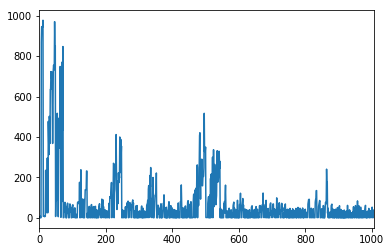

In [21]:
data['delay'].plot()

In [22]:
count_labels = 0
times = data['time'].values
first_time = times[0]
kq = []
for time in times:
    if first_time + 100000 > time:
        kq.append(count_labels)
    else:
        count_labels += 1
        first_time = time
        kq.append(count_labels)


In [23]:
len(kq)

1008

In [24]:
data['label_time'] = kq

In [25]:
data

,_id,byteReceived,byteSent,delay,dst,linkUtilization,packetLoss,src,time,label_time
0,620a378e5bb5a4c4edc9ecef,5.560000e+02,6.260000e+02,2.0,of:0000000000000003,1.000000,0.0,of:0000000000000004,1644836750522,0
1,620a37885bb5a4c4edc9ecea,5.560000e+02,7.843430e+08,1.0,of:0000000000000008,1.000000,0.0,of:0000000000000005,1644836744421,0
2,620a37885bb5a4c4edc9eceb,5.560000e+02,7.605481e+08,1.0,of:0000000000000005,1.000000,0.0,of:0000000000000006,1644836744522,0
3,620a378b5bb5a4c4edc9ecee,4.804098e+08,6.746880e+05,9.0,of:0000000000000001,0.134938,0.0,of:0000000000000004,1644836747430,0
4,620a37885bb5a4c4edc9eced,5.560000e+02,7.251730e+08,1.0,of:0000000000000007,1.000000,0.0,of:0000000000000008,1644836744622,0
5,620a37885bb5a4c4edc9ecec,5.560000e+02,7.390354e+08,1.0,of:0000000000000006,1.000000,0.0,of:0000000000000007,1644836744621,0
6,620a37925bb5a4c4edc9ecf0,7.940000e+02,5.860000e+02,869.0,of:0000000000000005,0.000117,1.0,of:0000000000000004,1644836754493,0
7,620a37925bb5a4c4edc9ecf1,5.560000e+02,7.843430e+08,945.0,of:0000000000000008,1.000000,0.0,of:0000000000000005,1644836754538,0
8,620a37925bb5a4c4edc9ecf2,7.940000e+02,5.860000e+02,945.0,of:0000000000000005,0.000117,0.0,of:0000000000000004,1644836754569,0
9,620a37925bb5a4c4edc9ecf3,6.158654e+10,7.659991e+07,945.0,of:0000000000000001,1.000000,0.0,of:0000000000000004,1644836754538,0


In [26]:
kq_tich = []
for i, cluster in data.groupby('label_time'):
    kq_tich.append(np.prod(cluster['delay'] + 0.001))
    

In [38]:
kq_tich = np.array(kq_tich)

In [44]:
df = pd.DataFrame(kq_tich)


df.to_csv("/home/onos/Downloads/flaskSDN/phanTichDijsktra.csv", index = False, header=False)

In [41]:
kq_tich

array([            inf, 1.31828898e+042, 1.37017272e+100, 2.11797246e+034,
       6.48259788e+194, 3.78325191e+022, 1.13413765e+026, 1.98307403e+060,
       9.47600933e+052, 1.71909674e+010, 1.38829074e+067, 3.38902485e+009,
       4.42220285e+035, 6.82978854e+014, 3.20330010e+001, 4.63152820e+007,
       2.91467948e+005, 3.74920654e+003])

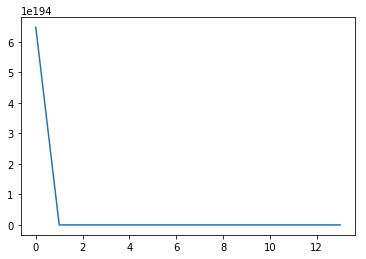

In [33]:
# dijktra 
plt.plot(kq_tich[4:])

In [29]:
def get_min_max_scale(x):
    print(x)    
    min, max = x.min(), x.max()
    #print("MIN = ", min, "MAX = ", max)
    # cong them 0.1 de tranh mau so bang 0 
    x_scaled = (x - min) / (max - min + 0.1)
    return x_scaled

In [30]:
import numpy as np

In [31]:
column = ['delay', 'byteSent']
for col in column:
    print(data[col])
    data[col] = get_min_max_scale(data[col])

0         2.0
1         1.0
2         1.0
3         9.0
4         1.0
5         1.0
6       869.0
7       945.0
8       945.0
9       945.0
10      943.0
11      977.0
12        8.0
13        8.0
14        8.0
15        8.0
16        6.0
17        8.0
18        8.0
19      235.0
20       26.0
21      235.0
22      235.0
23       26.0
24      296.0
25       26.0
26       26.0
27      477.0
28      385.0
29      313.0
        ...  
978       2.0
979      35.0
980      48.0
981      62.0
982       1.0
983      22.0
984       0.0
985       0.0
986      31.0
987      33.0
988       1.0
989      32.0
990      21.0
991      47.0
992       1.0
993      25.0
994       1.0
995      26.0
996       2.0
997      36.0
998       2.0
999       2.0
1000     49.0
1001     53.0
1002      1.0
1003     28.0
1004      3.0
1005     39.0
1006      1.0
1007     32.0
Name: delay, Length: 1008, dtype: float64
0         2.0
1         1.0
2         1.0
3         9.0
4         1.0
5         1.0
6       869.0
7     